In [43]:
import numpy as np
import os

In [44]:
# T = pow(10,3)
# N = 10

T = 2*pow(10, 3)
N = 500

PERIOD = 200
DISTRIBUTIONS = ["Gaussian", "Bernoulli"]
BASELINES = ["KL_UCB",  "KL_UCB_plus_plus","TS", "MOTS", "ExpTS_plus", "TSGreedy"]

In [45]:
# New Config
FOLDER = "rebuttal_results"
REPEAT_T = {
    "TS": [0, 936],
    "TSGreedy": [0, 936],
    "MOTS": [0, 936],
    "KL_UCB": [0, 936],
    "KL_UCB_plus_plus": [0, 936],
    "ExpTS": [0,936],
    "ExpTS_plus": [0,936]
}

NAME_IN_PLOT = {
    "TS": "TS",
    "TSGreedy": "ε-TS",
    "MOTS": "MOTS",
    "KL_UCB": "KL-UCB",
    "KL_UCB_plus_plus": "KL-UCB++",
    "ExpTS": "ExpTS",
    "ExpTS_plus": "ExpTS+"
}
PROBS_fn = lambda n: 1/n
PROBS = {
    "TS": 1.0,
    "TSGreedy": PROBS_fn(N),
    "MOTS": 1.0,
    "KL_UCB": 1.0,
    "KL_UCB_plus_plus": 1.0,
    "ExpTS": 1.0,
    "ExpTS_plus": PROBS_fn(N)

}

In [46]:
def load_avg(BASELINE, N, DISTRIBUTION, PROB, T, repeat):
    data = np.zeros((repeat, int(T/PERIOD)))
    for i in range(repeat):
        file = "{}-{}-{}-{}-{}-{}.npy".format(BASELINE, N, DISTRIBUTION, T, round(PROB, 2), i)
        data_t = np.load(os.path.join("./rebuttal_results", file))
        data[i] = data_t
    return data

# table

In [47]:
import pandas as pd

In [48]:
cols = ["baseline","distribution","800","1200", "1600", "2000"]
df = pd.DataFrame({}, columns=cols)
pick = [3,5,7,8]

In [49]:
for BASELINE in BASELINES:
    for DISTRIBUTION in DISTRIBUTIONS:
        PROB = PROBS[BASELINE]
        REPEAT = REPEAT_T[BASELINE][1]
        data = load_avg(BASELINE, N, DISTRIBUTION, PROB,T, REPEAT)
        data = data[:, pick]
        vars = data.var(axis=0)
        percentile_5 = np.percentile(data, 5, axis=0)
        percentile_95 = np.percentile(data, 95, axis=0)
        means = data.mean(axis=0)
        print(BASELINE, DISTRIBUTION)

        data_t = np.array([BASELINE, DISTRIBUTION])
        for i, (m, p5,p95, var) in enumerate(zip(means, percentile_5, percentile_95, vars)):
            data_t = np.concatenate((data_t, np.array([f'{m:.1f}({p5:.1f} {p95:.1f})'])), axis=0)
            
        df.loc[len(df.index)] = data_t

KL_UCB Gaussian
KL_UCB Bernoulli
KL_UCB_plus_plus Gaussian
KL_UCB_plus_plus Bernoulli
TS Gaussian
TS Bernoulli
MOTS Gaussian
MOTS Bernoulli
ExpTS_plus Gaussian
ExpTS_plus Bernoulli
TSGreedy Gaussian
TSGreedy Bernoulli


In [50]:
df_tmp = df[df.distribution=="Gaussian"]
df_tmp = df_tmp.drop(columns=["distribution"])
print(df_tmp.to_markdown(index=False))

| baseline         | 800                | 1200                  | 1600                  | 2000                  |
|:-----------------|:-------------------|:----------------------|:----------------------|:----------------------|
| KL_UCB           | 594.2(590.0 598.0) | 1383.4(1372.0 1394.0) | 2161.4(2136.0 2184.0) | 2543.8(2508.0 2574.0) |
| KL_UCB_plus_plus | 525.1(253.5 598.0) | 763.5(253.5 1396.0)   | 919.0(253.5 2196.0)   | 996.8(253.5 2596.0)   |
| TS               | 583.4(558.0 598.0) | 1289.9(1178.0 1386.5) | 1761.3(1569.5 2012.0) | 1905.5(1705.5 2160.0) |
| MOTS             | 585.8(568.0 598.0) | 1318.4(1225.5 1390.0) | 1865.2(1688.0 2096.0) | 2044.4(1846.0 2299.0) |
| ExpTS_plus       | 336.8(222.0 600.0) | 609.7(458.0 1359.0)   | 815.5(652.0 1497.5)   | 899.7(734.0 1558.0)   |
| TSGreedy         | 185.4(50.0 600.0)  | 274.6(92.0 1398.0)    | 337.4(130.0 1454.0)   | 363.7(146.0 1455.5)   |


In [51]:
df_tmp = df[df.distribution=="Bernoulli"]
df_tmp = df_tmp.drop(columns=["distribution"])
print(df_tmp.to_markdown(index=False))

| baseline         | 800                | 1200               | 1600               | 2000               |
|:-----------------|:-------------------|:-------------------|:-------------------|:-------------------|
| KL_UCB           | 148.3(145.0 149.5) | 348.3(345.0 349.5) | 548.3(545.0 549.5) | 648.3(645.0 649.5) |
| KL_UCB_plus_plus | 148.3(145.0 149.5) | 348.3(345.0 349.5) | 548.3(545.0 549.5) | 648.3(645.0 649.5) |
| TS               | 147.7(142.5 150.0) | 345.2(336.5 350.0) | 541.9(529.0 549.5) | 639.4(623.4 649.0) |
| MOTS             | 148.8(147.5 150.0) | 347.7(345.0 350.0) | 545.4(540.5 549.0) | 643.9(637.9 649.0) |
| ExpTS_plus       | 148.4(145.0 150.0) | 303.2(260.4 350.0) | 426.8(361.5 549.0) | 484.9(410.0 649.0) |
| TSGreedy         | 122.2(83.0 150.0)  | 198.4(97.5 350.0)  | 262.3(113.0 550.0) | 291.4(120.5 650.0) |


# plot in paper

In [52]:
import matplotlib.pyplot as plt

In [53]:
palette = plt.get_cmap('Set1')
colormap = {
    "lower bound": palette(3),
    "KL_UCB":palette(2),
    "KL_UCB_plus_plus":(0,0,0,1),
    "TS":palette(4),
    "MOTS":palette(8), 
    "ExpTS":palette(6), 
    "ExpTS_plus": palette(1),
    "TSGreedy":palette(0)
}
linestyles = {
    "lower bound": "solid",
    "KL_UCB":"dotted",
    "KL_UCB_plus_plus":"dotted",
    "TS":"dashed",
    "MOTS":"dashdot", 
    "ExpTS":"dashed", 
    "ExpTS_plus": "dashdot",
    "TSGreedy":"solid"
}

In [54]:
N = 10
T = pow(10,3)
# N = 10
# T = pow(10, 3)
DISTRIBUTION = "Bernoulli"
# DISTRIBUTION = "Gaussian"

In [55]:
PERIOD = 200
BASELINES = ["KL_UCB",  "KL_UCB_plus_plus","TS", "MOTS", "ExpTS_plus", "TSGreedy"]
record_time = np.zeros(int(T/PERIOD))
for t in range(1, T+1):
    if t % PERIOD == 0:
        record_time[int(t/PERIOD)-1] = t
PROBS_fn = lambda n: 1/n
PROBS = {
    "TS": 1.0,
    "TSGreedy": PROBS_fn(N),
    "MOTS": 1.0,
    "KL_UCB": 1.0,
    "KL_UCB_plus_plus": 1.0,
    "ExpTS": 1.0,
    "ExpTS_plus": PROBS_fn(N)

}

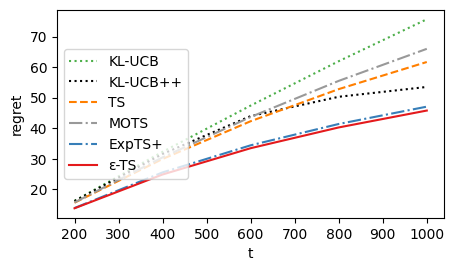

In [56]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7))
for BASELINE in BASELINES:
    if BASELINE == "MOTS":
        if DISTRIBUTION in ["Gamma", "Poisson"]:
            continue
    PROB = PROBS[BASELINE]
    REPEAT = REPEAT_T[BASELINE][1]
    data = load_avg(BASELINE, N, DISTRIBUTION, PROB,T, REPEAT)
    
    means = data.mean(axis=0)
    ax.plot(record_time, means, label="{}".format(NAME_IN_PLOT[BASELINE]), color=colormap[BASELINE], linestyle=linestyles[BASELINE])

    # percentile_5 = np.percentile(data, 5, axis=0)
    # percentile_95 = np.percentile(data, 95, axis=0)
    # ax.fill_between(record_time, percentile_5, percentile_95, color=colormap[BASELINE], alpha=0.2)

        
ax.set_xlabel('t')  # Add an x-label to the axes.
ax.set_ylabel('regret')  # Add a y-label to the axes.
# ax.set_title(f'N={N} {DISTRIBUTION}')  # Add a title to the axes.
ax.legend(loc="center left",ncol=1, bbox_to_anchor=(0, 0.5), bbox_transform=ax.transAxes)  # Add a legend.
plt.savefig("rebuttal_plot_results/{}_{}.pdf".format(N, DISTRIBUTION),
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.0,
    )